# Descriptive analysis of network graph characteristics

Some note from Chapter 4 from [Statistical Analysis of Network Data with R](http://link.springer.com/book/10.1007%2F978-1-4939-0983-4).


In [2]:
library(sand)
options(repr.plot.width=4, repr.plot.height=3)

Loading required package: igraph

Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union

Loading required package: igraphdata

Statistical Analysis of Network Data with R
Type in C2 (+ENTER) to start with Chapter 2.


## Vertex Centrality

### Coloseness centrality

Intuition: A vertex is central if it is 'close' to many other vertices.

It is defined as
$$
c_{Cl}(v) = \frac{1}{\sum_{u \in V} \text{dist} (v, u)}.
$$

Often normalized for comparison between graphs.

### Betweenness centrality

Intuition: The extent to which a vertex is located ‘between’ other pairs of vertices.

$$
c_B(v) = \sum_{s \neq t \neq v \in V} \frac{\sigma (s,t | v)}{\sigma (s, t)}, 
$$

where $\sigma (s, t | v)$ is the total number of shortest paths between $s$ and $t$ that pass through $v$, and $\sigma(s,t)$ is the total number of shortest paths between $s$ and $t$.

Can be restricted to unit interval through divisino by 
$(N_v -1) (N_v -2) /2$.

### Eigenvector centrality

Try to capture 'status' or 'prestige'. They seek to capture the idea that the more central the neighbors
of a vertex are, the more central that vertex itself is.

There are may different measures, e.g.

$$
c_{Ei}(v) = \alpha \sum_{\{u, v\} \in E} c_{Ei}(u).
$$

where $\mathbf c_{Ei} = (c_{Ei}(1), \ldots , c_{Ei}(N_v))^T$ is the solution to the eigenvalue problem
$ A \mathbf c_{Ei} = \alpha^{-1} \mathbf c_{Ei}$. Here $A$ is the adjacency matrix for the network.

### Visualization

Small graphs can be visualized throug a radial layout, when more central nodes are placed more central.

Under we only show degree, but we coulde have used closeness, betweenness or eigenvector as well.

network: Classes for Relational Data
Version 1.13.0 created on 2015-08-31.
copyright (c) 2005, Carter T. Butts, University of California-Irvine
                    Mark S. Handcock, University of California -- Los Angeles
                    David R. Hunter, Penn State University
                    Martina Morris, University of Washington
                    Skye Bender-deMoll, University of Washington
 For citation information, type citation("network").
 Type help("network-package") to get started.


Attaching package: ‘network’

The following objects are masked from ‘package:igraph’:

    %c%, %s%, add.edges, add.vertices, delete.edges, delete.vertices,
    get.edge.attribute, get.edges, get.vertex.attribute, is.bipartite,
    is.directed, list.edge.attributes, list.vertex.attributes,
    set.edge.attribute, set.vertex.attribute

sna: Tools for Social Network Analysis
Version 2.3-2 created on 2014-01-13.
copyright (c) 2005, Carter T. Butts, University of California-Irvine
 For citat

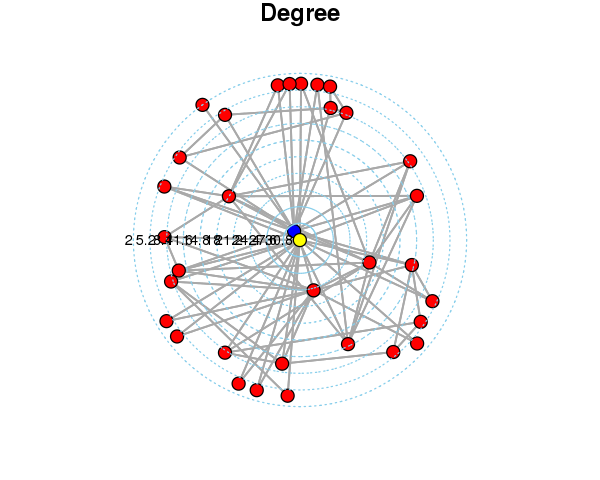

In [3]:
data(karate)
A <- get.adjacency(karate, sparse=FALSE)
library(network)
g <- network::as.network.matrix(A)
library(sna)
par(mar=rep(1, 4))
options(repr.plot.width=5, repr.plot.height=4)
sna::gplot.target(g, 
                  degree(g), # closeness(g), betweenness(g), evcent(g)$vector
                  main="Degree",
#                   circ.lab = FALSE, 
                  circ.col="skyblue",
                  usearrows = FALSE,
                  vertex.col=c("blue", rep("red", 32), "yellow"),
                  edge.col="darkgray")

## Directed graphs

The measures can easily be extended to directed graphs.

### HITS: Hubs and Authorities

This is another measure for centrality.

Hubs can be found by eigenvector centrality of $AA^T$, and authorities by the eigenvector centrality of $A^T A$.

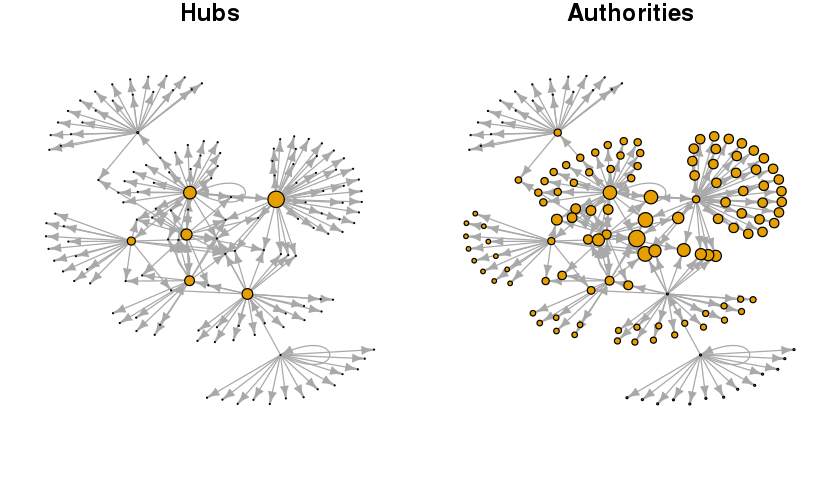

In [4]:
aidsblog = upgrade_graph(aidsblog)
l <- layout.kamada.kawai(aidsblog)
par(mfrow=c(1,2), mar=rep(1, 4))
options(repr.plot.width=7, repr.plot.height=4)
plot(aidsblog, layout=l, main="Hubs", vertex.label="",
     vertex.size=10 * sqrt(hub.score(aidsblog)$vector),
     edge.arrow.size=0.5)
plot(aidsblog, layout=l, main="Authorities", 
     vertex.label="", 
     vertex.size=10 * sqrt(authority.score(aidsblog)$vector), 
     edge.arrow.size=0.5)

## Edge characterization

Most important edges.

Betweenness centrality shows number of shortest path through that edge. 

In [5]:
eb <- edge.betweenness(karate)
E(karate)[order(eb, decreasing=T)[1:3]]

+ 3/78 edges (vertex names):
[1] Actor 20--John A   Mr Hi   --Actor 20 Mr Hi   --Actor 32

However, many other vertex centrality measures does not extend as easily. One way around this is to represent edges with vertices and vise verca.

This is called the *line graph* of $G$.

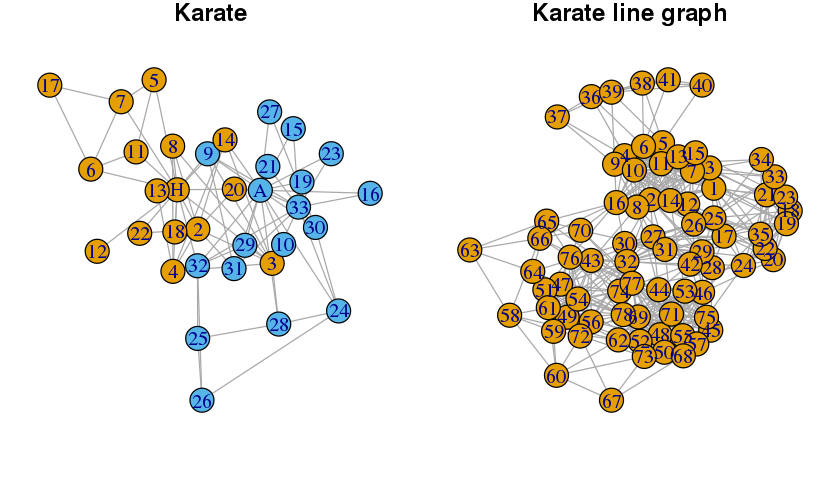

In [6]:
par(mfrow=c(1, 2), mar=rep(1, 4))
plot(karate, layout=layout.kamada.kawai,
    main='Karate')
plot(line.graph(karate), layout=layout.kamada.kawai,
    main='Karate line graph')

# Characterizing Network Cohesion

Cohesion is the extent to which subsets of vertices are cohesive, or ‘stuck together’.

One example is to investigate the cliques

In [7]:
table(sapply(cliques(karate), length))


 1  2  3  4  5 
34 78 45 11  2 

In [8]:
for (k in cliques(karate)[sapply(cliques(karate), length) == 5]){
    print(k)
}

+ 5/34 vertices, named:
[1] Mr Hi   Actor 2 Actor 3 Actor 4 Actor 8
+ 5/34 vertices, named:
[1] Mr Hi    Actor 2  Actor 3  Actor 4  Actor 14


In [9]:
table(sapply(maximal.cliques(karate), length))


 2  3  4  5 
11 21  2  2 

The size of the largest clique is called the *clique number*.

In [10]:
clique.number(karate)

[1] 5

The $k$-core of a graph $G$ is the subgraph of $G$ for which all vertex degrees are at least $k$, and such that no other
subgraph obeying the same condition contains it (i.e., it is maximal in this property).

This is popular in visualization, as it provides layers

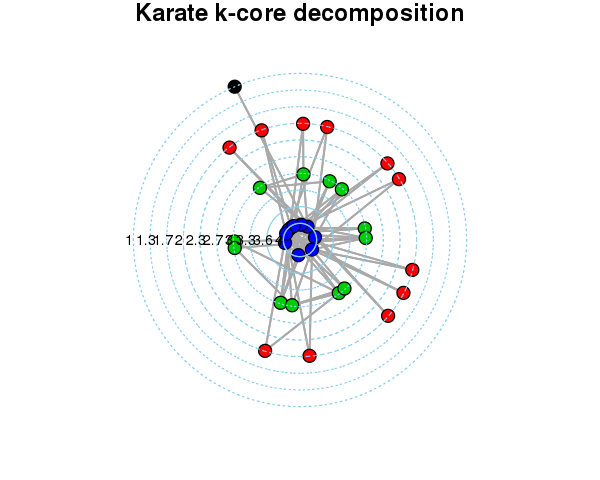

In [11]:
cores <- graph.coreness(karate)
par(mar=rep(1,4))
options(repr.plot.width=5, repr.plot.height=4)
sna::gplot.target(g, cores, 
#                   circ.lab = FALSE,
                  circ.col="skyblue", usearrows = FALSE,
                  vertex.col=cores, edge.col="darkgray",
                  main='Karate k-core decomposition')

In [12]:
detach("package:network")
detach("package:sna")

### Diads and triads

Dyads are pairs of vertices and, in directed graphs, may take on three possible states: null (no directed edges), asymmetric (one directed edge), or mutual (two directed edges).

Similarly, triads are triples of vertices and may take on 16 possible states, ranging from the null subgraph to the subgraph in which all three dyads formed by the vertices in the triad have mutual directed edges.

In [13]:
aidsblog <- simplify(aidsblog) #removes loops and multiple edges
dyad.census(aidsblog)

$mut
[1] 3

$asym
[1] 177

$null
[1] 10405

## Density and related notions of relative frequency

The *density* of a graph is the frequency of realized edges relative to potential edges. For example, in a (undirected) graph $G$ with no self-loops and no multiple edges, the density of a subgraph $H = (V_H , E_H )$ is

$$
\text{den}(H) = \frac{|E_H|}{|V_H|(|V_H| - 1)/2},
$$

and measures how close $H$ is to being a clique.

In the case that $G$ is a directed graph, the denominator is replaced by $|V_H |(|V_H | − 1)$.

In [14]:
ego.instr <- induced.subgraph(karate,
   neighborhood(karate, 1, 1)[[1]])
ego.admin <- induced.subgraph(karate,
   neighborhood(karate, 1, 34)[[1]])
c(graph.density(karate), 
  graph.density(ego.instr),
  graph.density(ego.admin))

[1] 0.1390374 0.2500000 0.2091503

The **clustering coefficient**, or *transitivity*, typically refers to the quantity

$$
\text{cl}_T(G) = \frac{3 \tau_{\Delta}(G)}{\tau_3(G)}
$$

where $\tau_{\Delta}(G)$ is the number of triangles in the graph $G$, and $\tau_3(G)$, the number of connected triples (i.e., a subgraph of three vertices connected by two edges, also sometimes called a 2-star).

In the karate network we see that only about one quarter of the connected triples close in this manner.


In [15]:
transitivity(karate)

[1] 0.2556818

**Resiprocity** measures the extent to which there is reciprocation among ties in a directed network. There are two main approaches to capturing this notion.

1. Number of dyads with reciprocated directed edges divided by the number of dyads with a single, unreciprocated edge.
2. Total number of reciprocated edges divided by the total number of edges.

In [16]:
reciprocity(aidsblog, mode='default')

[1] 0.03278689

In [17]:
reciprocity(aidsblog, mode='ratio')

[1] 0.01666667

## Connectivity, cuts, and flows

# Graph partitioning

## Hierarchical Clustering

In [35]:
kc <- fastgreedy.community(karate) #hierarchical clustering
length(kc)

[1] 3

In [36]:
sizes(kc)

Community sizes
 1  2  3 
18 11  5 

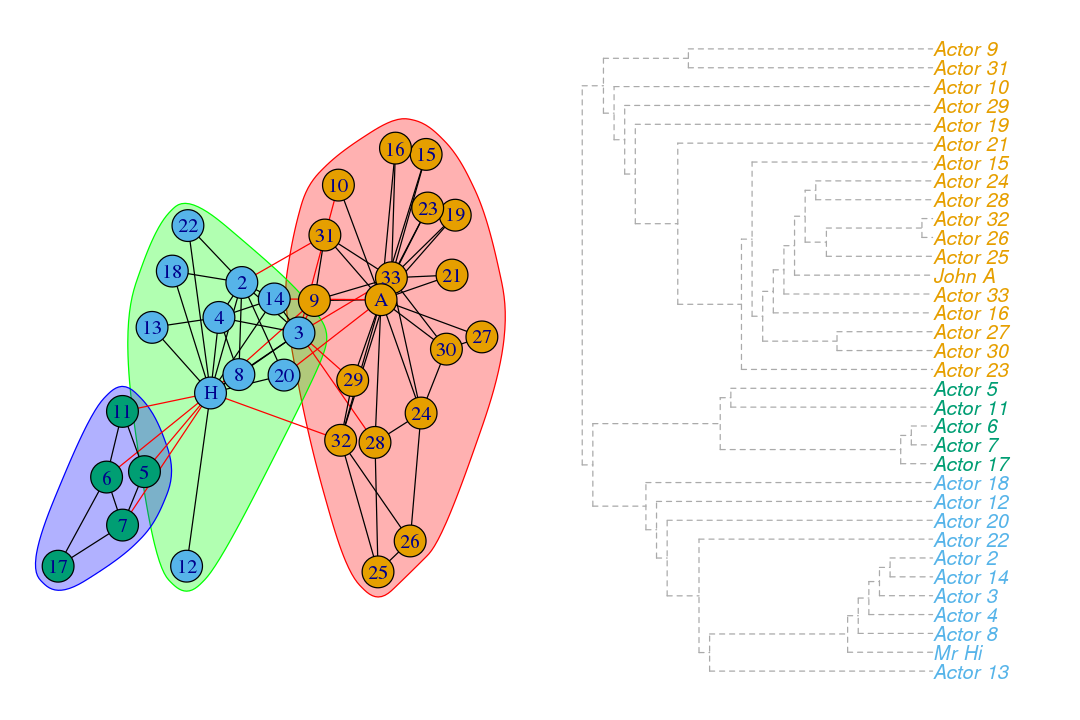

In [54]:
par(mfrow=c(1, 2), mar=rep(1, 4))
options(repr.plot.width=9, repr.plot.height=6)
plot(kc, karate)
library(ape)
dendPlot(kc, mode='phylo')

## Spectral Partitioning